In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.datasets import make_blobs

In [3]:
def sigmoid(X):
    sigmoid_function = 1 / (1 + np.exp(-X))     
    return sigmoid_function
    

In [4]:
def perceptron(X,W,b):
    inputs = np.array(X)
    weights = np.array(W)
    bias = b
    
    prediction = inputs.dot(weights) + b
    h = sigmoid(prediction)
    
    return h

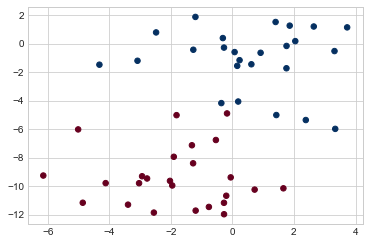

In [5]:
X, y = make_blobs(50, 2, centers=2, random_state=2, cluster_std=2)
W = [.38, 0.65]
b = 3
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap='RdBu')



In [6]:
prediction = perceptron(X, W, b)
prediction

array([0.98931293, 0.90365089, 0.0487838 , 0.01457247, 0.95832753,
       0.91158225, 0.00749436, 0.00340903, 0.00222298, 0.88553449,
       0.94932685, 0.74002771, 0.00623619, 0.27826097, 0.98923391,
       0.97242819, 0.01468627, 0.97727756, 0.01254927, 0.01743446,
       0.03278214, 0.98056939, 0.10560561, 0.00718131, 0.59431337,
       0.0528826 , 0.97998303, 0.01772803, 0.01528444, 0.00355744,
       0.16793468, 0.43771957, 0.57069272, 0.00471033, 0.92713622,
       0.90823274, 0.9334949 , 0.93791674, 0.05632695, 0.99428526,
       0.60582437, 0.99172393, 0.59785991, 0.04219199, 0.00866452,
       0.60382068, 0.01077041, 0.92882957, 0.05000508, 0.53750983])

Now that we can se how far off a model is using an error term, we can adjust the weights in order to lower that error term.

This is done by looking at the instantaneous rate of change of the error - at the current weight set respective to the current inputs.

$$ \Delta w = - gradient $$

We find the slope, and then move down (negative) the slope. That change becomes our change in weights. Said another way

$$ \frac{\delta E}{\delta w_i} $$

We can reduce the derivative of this function down to

$$ - (y - \hat{y}) f^\prime(h) x_i $$

This is the negative error multiplied by the prime of the sigmoid function, multiplied by the input.

So taking that function, we can multiply it be a small numer representating a small step down that gradient, and we get 

$$ \Delta w = \eta (y - \hat{y}) f^\prime(h) x_i $$

Where $\eta$ is some small step known as the learning rate.

(Note that we remove the negative because we need to move down the derative to improve the model and reduce the error.)

So, our error term is
$$ \delta = (y - \hat{y}) f^\prime(h) $$
And our full weight change is
$$ w_i = w_i + \eta \delta \ x_i $$

In [7]:
# Setting functions

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [8]:
# Setting variables
learnrate = 0.5

In [9]:
# Set up arrays
inputs = np.array(X)
weights = np.array(W)
bias = b

# Calculate Perceptron
h = inputs.dot(weights) + b

# Activate it
prediction = sigmoid(h)

# output Gradient
gradient = sigmoid_prime(h)

# Calculate error
error = y - prediction
error_term = error * gradient

# Find changes in weights
del_w = learnrate * error_term * inputs.T
del_w


array([[ 1.05097031e-04, -5.33949619e-03, -1.87354980e-03,
         2.04841137e-04, -2.60660295e-04,  8.20316372e-04,
         7.64644352e-06,  1.47982545e-05,  1.19987025e-05,
         8.96976133e-04,  1.11413946e-03, -7.72083925e-02,
         2.31309671e-05,  5.08042725e-02,  8.03581028e-05,
         6.49419651e-04,  2.94959768e-04, -3.03813371e-04,
         2.14902201e-05,  3.03355997e-04, -3.74525269e-04,
         6.13866680e-04,  6.57518610e-03,  1.05538644e-04,
         1.63363113e-01,  2.52567263e-03,  4.00873734e-04,
         3.11776002e-05,  3.37976832e-04,  2.14123864e-05,
         6.32657212e-03,  9.54472883e-03,  7.49670543e-02,
         6.79001893e-05,  4.31732240e-03,  2.34925973e-03,
         1.42936036e-04, -4.99072887e-04,  7.50941585e-03,
         6.05224597e-05,  8.72887544e-03,  8.97530620e-05,
        -2.09110333e-01,  4.89524777e-05,  2.85399085e-05,
         1.12947001e-01,  1.74212202e-04, -5.84015146e-03,
         1.52039886e-03, -2.08157405e-02],
       [ 7.13